In [1]:
import numpy as np
import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score

from mlxtend.evaluate.time_series import (
    GroupTimeSeriesSplit,
    plot_splits,
    print_cv_info,
    print_split_info,
)

In [2]:
data = [[0], [7], [6], [4], [4], [8], [0], [6], [2], [0], [5], [9], [7], [7], [7], [7]]
target = [1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0]

X = pd.DataFrame(data, columns=["num_feature"])
y = pd.Series(target, name="target")

In [4]:
X

,num_feature
0,0
1,7
2,6
3,4
4,4
5,8
6,0
7,6
8,2
9,0


In [5]:
groups = np.array([0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 4, 5, 5, 5, 5])
groups

array([0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 4, 5, 5, 5, 5])

In [6]:
months_map = {i: f"2021-0{i+1}" for i in range(6)}
months = np.array([months_map[group] for group in groups])
months

array(['2021-01', '2021-02', '2021-02', '2021-02', '2021-02', '2021-03',
       '2021-03', '2021-03', '2021-04', '2021-04', '2021-05', '2021-05',
       '2021-06', '2021-06', '2021-06', '2021-06'], dtype='<U7')

In [7]:
X = X.set_index(months)

In [8]:
X

,num_feature
2021-01,0
2021-02,7
2021-02,6
2021-02,4
2021-02,4
2021-03,8
2021-03,0
2021-03,6
2021-04,2
2021-04,0


# Example 1 -- Multiple training groups (with train size specified)
Let's create a time series splitting with a training dataset that consists of 3 groups. And we will use 1 group for testing. In this case, the number of splits will be calculated automatically since both the training set and the test set sizes are specified.

The first 3 rows in the visualization describe how each split is distributed among groups.
The groups are visualized in the last row where each color represents different group.

In [18]:
cv_args = {"test_size": 1, "train_size": 3, "window_type": 'expanding'}

plot_splits(X, y, groups, **cv_args)
print_split_info(X, y, groups, **cv_args)

ValueError: Train size can be specified only with rolling window

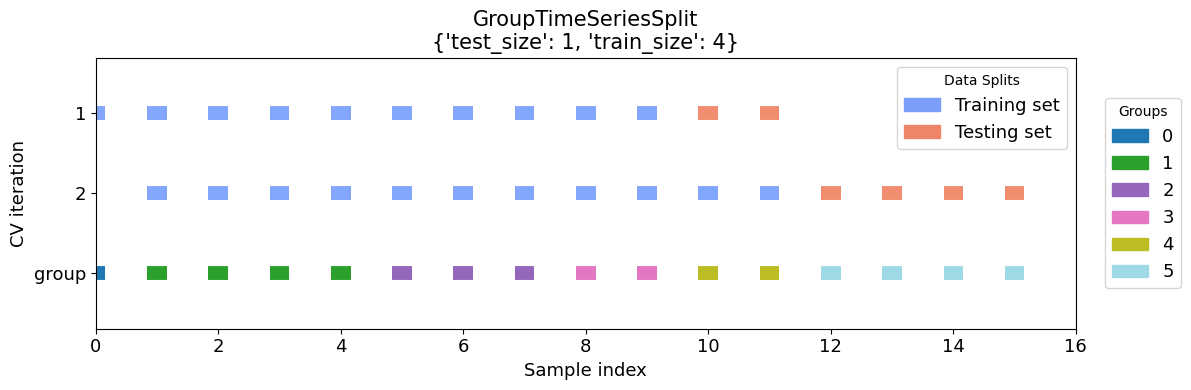

In [10]:
cv_args = {"test_size": 1, "train_size": 4}

plot_splits(X, y, groups, **cv_args)

# Usage in CV
The example below illustrates how we can use the time series splitter with scikit-learn, i.e., using cross_val_score:


In [11]:
cv = GroupTimeSeriesSplit(**cv_args)
clf = DummyClassifier(strategy="most_frequent")

scores = cross_val_score(clf, X, y, groups=groups, scoring="accuracy", cv=cv)
print_cv_info(cv, X, y, groups, clf, scores)

Split number: 1
Train true target: [1 0 1 0 1 0 0 1 1 1]
Train predicted target: [1 1 1 1 1 1 1 1 1 1]
Test true target: [0 1]
Test predicted target: [1 1]
Accuracy: 0.5

Split number: 2
Train true target: [0 1 0 1 0 0 1 1 1 0 1]
Train predicted target: [1 1 1 1 1 1 1 1 1 1 1]
Test true target: [1 0 0 0]
Test predicted target: [1 1 1 1]
Accuracy: 0.25



# Example 2 -- Multiple training groups (with number of splits specified)
Now let's take a look at an example where we don't specify the number of training groups. Here, we will split the dataset with test size (2 groups) and a specified number of splits (3 groups), which is sufficient for calculating the training size automatically.

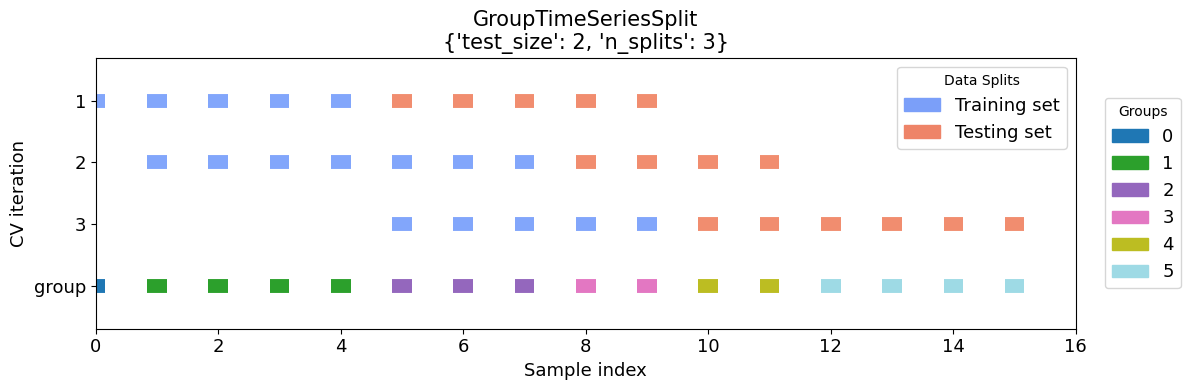

Train indices: [0 1 2 3 4]
Test indices: [5 6 7 8 9]
Train length: 5
Test length: 5
Train groups: [0 1 1 1 1]
Test groups: [2 2 2 3 3]
Train group size: 2
Test group size: 2
Train group months: ['2021-01' '2021-02' '2021-02' '2021-02' '2021-02']
Test group months: ['2021-03' '2021-03' '2021-03' '2021-04' '2021-04']

Train indices: [1 2 3 4 5 6 7]
Test indices: [ 8  9 10 11]
Train length: 7
Test length: 4
Train groups: [1 1 1 1 2 2 2]
Test groups: [3 3 4 4]
Train group size: 2
Test group size: 2
Train group months: ['2021-02' '2021-02' '2021-02' '2021-02' '2021-03' '2021-03' '2021-03']
Test group months: ['2021-04' '2021-04' '2021-05' '2021-05']

Train indices: [5 6 7 8 9]
Test indices: [10 11 12 13 14 15]
Train length: 5
Test length: 6
Train groups: [2 2 2 3 3]
Test groups: [4 4 5 5 5 5]
Train group size: 2
Test group size: 2
Train group months: ['2021-03' '2021-03' '2021-03' '2021-04' '2021-04']
Test group months: ['2021-05' '2021-05' '2021-06' '2021-06' '2021-06' '2021-06']



In [12]:
cv_args = {"test_size": 2, "n_splits": 3}

plot_splits(X, y, groups, **cv_args)
print_split_info(X, y, groups, **cv_args)

In [13]:
cv = GroupTimeSeriesSplit(**cv_args)
clf = DummyClassifier(strategy="most_frequent")

scores = cross_val_score(clf, X, y, groups=groups, scoring="accuracy", cv=cv)
print_cv_info(cv, X, y, groups, clf, scores)

Split number: 1
Train true target: [1 0 1 0 1]
Train predicted target: [1 1 1 1 1]
Test true target: [0 0 1 1 1]
Test predicted target: [1 1 1 1 1]
Accuracy: 0.6

Split number: 2
Train true target: [0 1 0 1 0 0 1]
Train predicted target: [0 0 0 0 0 0 0]
Test true target: [1 1 0 1]
Test predicted target: [0 0 0 0]
Accuracy: 0.25

Split number: 3
Train true target: [0 0 1 1 1]
Train predicted target: [1 1 1 1 1]
Test true target: [0 1 1 0 0 0]
Test predicted target: [1 1 1 1 1 1]
Accuracy: 0.33



# Example 3 -- Defining the gap size between training and test datasets
GroupTimeSeriesSplit let's you specify a gap size greater than 1 in order to skip a specified number of groups between training and test folds (the default gap size is 0). In the example below, we use a gap of 1 group to illustrate this.

In [26]:
cv_args = {"test_size": 1,"n_splits":5, "gap_size": 1, "window_type": 'expanding'}

plot_splits(X, y, groups, **cv_args)
print_split_info(X, y, groups, **cv_args)

ValueError: Not enough data to split number of groups (6) for number splits (5) with train size (0), test size (1), gap size (1), shift size (1)

In [15]:
cv = GroupTimeSeriesSplit(**cv_args)
clf = DummyClassifier(strategy="most_frequent")

scores = cross_val_score(clf, X, y, groups=groups, scoring="accuracy", cv=cv)
print_cv_info(cv, X, y, groups, clf, scores)

Split number: 1
Train true target: [1 0 1 0 1]
Train predicted target: [1 1 1 1 1]
Test true target: [1 1]
Test predicted target: [1 1]
Accuracy: 1.0

Split number: 2
Train true target: [0 1 0 1 0 0 1]
Train predicted target: [0 0 0 0 0 0 0]
Test true target: [0 1]
Test predicted target: [0 0]
Accuracy: 0.5

Split number: 3
Train true target: [0 0 1 1 1]
Train predicted target: [1 1 1 1 1]
Test true target: [1 0 0 0]
Test predicted target: [1 1 1 1]
Accuracy: 0.25

